# Step files

We have previously mentioned the step files.

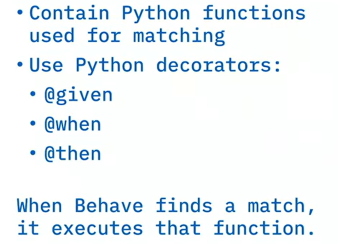

Let’s discuss how to create one.
* Step files are Python files containing functions that match the **Gherkin** statements in the feature file.
* The **Behave** tool provides a set of Python decorators to use in matching `Given`, `When`, and `Then`.
* When **Behave** finds a `Given` statement in the feature file, it searches the step file for a function annotated with the `@given` decorator, containing a matching string.
* When Behave finds a match, it executes that function.
* The best way to explain the process is to show you an example, starting with the feature file.

# Feature example

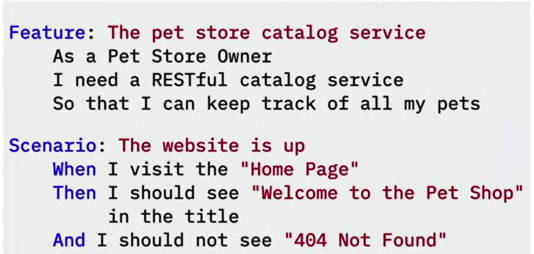

Say you create a Feature called “The pet store catalog service”. 

You describe it with 
> As a Pet Store Owner
> 
> I need a RESTful catalog service
> 
> So that I can keep track of all my pets

You have a scenario called “**The website is up**". 
You’re just testing to check if the website is up and responding.
The **Gherkin** statements are: 
> `When` I visit the ‘Home Page’
> 
> `Then` I should see ‘Welcome to the Pet Shop’
> 
> `And` I should not see ‘404 Not Found’” 

Now you can write a step file that matches these three statements.


# Step Implementation

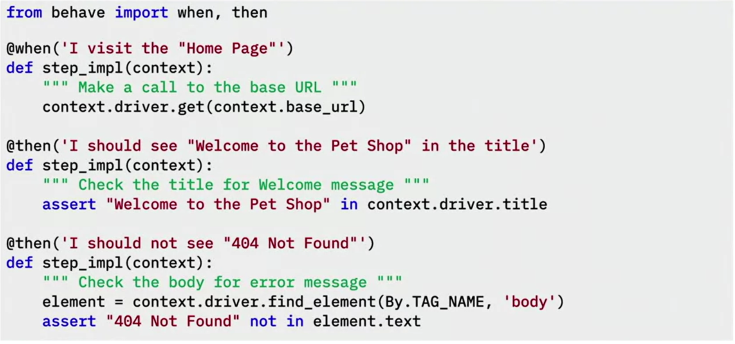

You start by importing the `when` and `then` decorators from Behave.
* Since you don’t use the `Given` keyword in the feature file, you don’t need to import the `Given` keyword decorator here.

Next, you have your first Python step.
* You use the `@when` decorator with the string **‘I visit the “Home Page”’**.
* This code indicates that Behave should invoke the function that follows when looking for a match for the statement **“When I visit the home page”**. 
* To implement this step, first, you define a function inside it called `step_impl()`, passing in the `context` and adding the appropriate `docstring`.
* You use `step_impl()` inside every step because Behave doesn’t use the function names for matching; it only matches based on the text string in the decorators `given`, `when`, and `then`.

Let’s think about how you should implement this step.
* In the `environment.py` file, you added a **webdriver** and a **baseURL** to the `context` and called them `context.driver` and `context.base_url`, respectively.
* Now it’s time to use those variables.
* The `WebDriver` has methods `get`, `put`, `post`, and `delete` to make the corresponding HTTP verb requests.
* In this step, you want to get the home page, which is represented by the `base_url`.
* So you add the statement `context.driver.get(context.base_url)`.
* This statement will make an HTTP GET request to call the base URL and return the home page.

Notice that you didn’t make any assertions in this step.
* In TDD, **every function is a test case** and **has an assertion**.
* But in BDD, **each step is just one part of a test case**; it’s not an entire test case itself.
* One step may be to set something up, like a state, and the following step asserts something about that state.
* In this first step of this example, you implemented the action specified by the statement: **to visit the home page**.
* In the following steps, you make **assertions about the home page**.

For the next step, we use the decorator `@then` with the string **‘I should see “Welcome to the Pet Shop” in the title’**.
* This step will match the second statement in your scenario.
* Again, you define a `step_impl()` function, passing in the `context`, and adding the appropriate **docstring**.
* Next, to finish this implementation step, you `assert` that the string **“Welcome to the Pet Shop”** is in the title of the web page that the web driver brings back.
* This title is held in `context.driver.title`.

For the last step, you use the `@then` decorator again.
* You do this because in the feature, this statement has an `And` keyword and the statement before it has a `Then`.
* You add the string **‘I should not see “404 Not Found”’**.
* This step will match the third statement in your scenario.
* You define a function for this, passing in the `context` and an appropriate **docstring**.
* To finish implementing this step, first, you must find the body element of the web page’s HTML.
* You use the `find_element()` function on the web driver and specify that the function should look for the tag named **‘body’**.
* You save that element as the variable called `element`.
* Then you assert that the string **“404 Not Found”** is not in the element’s text.
    

# Step Workflow

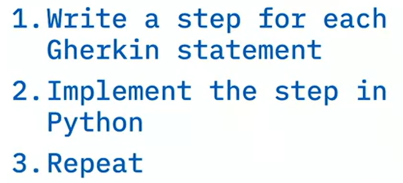

Those are the basics of writing steps for Behave.
* You write a step for each Gherkin statement in your scenario.
* Implement the step in Python.
* Repeat until all of the statements have steps.